In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

d0=pd.read_csv('D:/Datasets/digit-recognizer/train.csv')
l=d0['label']
d=d0.drop('label',axis=1)
labels=l.head(15000)
data=d.head(15000)

from sklearn.preprocessing import StandardScaler
standardized_data=StandardScaler().fit_transform(data)

sample_data=standardized_data

covar_matrix=np.matmul(sample_data.T,sample_data)

from scipy.linalg import eigh
values,vectors=eigh(covar_matrix,eigvals=(782,783))
vectors=vectors.T
 
import matplotlib.pyplot as plt
new_coordinates=np.matmul(vectors,sample_data.T)
new_coordinates=np.vstack((new_coordinates,labels)).T

import pandas as pd
dataframe=pd.DataFrame(data=new_coordinates,columns=("1st_principal","2nd_principal","labels"))
print(dataframe.head())

import seaborn as sn
sn.FacetGrid(dataframe,hue="labels",size=6)\
  .map(plt.scatter,'1st_principal','2nd_principal')\
  .add_legend()

   1st_principal  2nd_principal  labels
0      -5.558661      -5.043558     1.0
1       6.193635      19.305278     0.0
2      -1.909878      -7.678775     1.0
3       5.525748      -0.464845     4.0
4       6.366527      26.644289     0.0


C:\Users\aryan\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


In [2]:
#PCA using SCIKIT-LEARN

from sklearn import decomposition

pca=decomposition.PCA()
pca.n_components=2
pca_data=pca.fit_transform(sample_data)

In [3]:
pca_data=np.vstack((pca_data.T,labels)).T
pca_df=pd.DataFrame(data=pca_data,columns=("1st_principal","2nd_principal","labels"))
print(pca_df)

       1st_principal  2nd_principal  labels
0          -5.043535      -5.559949     1.0
1          19.305251       6.192436     0.0
2          -7.678803      -1.909240     1.0
3          -0.464839       5.526077     4.0
4          26.644291       6.365868     0.0
...              ...            ...     ...
14995      -4.759002       3.140418     1.0
14996      -1.314193       1.947317     4.0
14997      -1.507288      -2.148858     8.0
14998      -6.537286       3.204821     9.0
14999      -1.256239      -6.879597     6.0

[15000 rows x 3 columns]


C:\Users\aryan\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


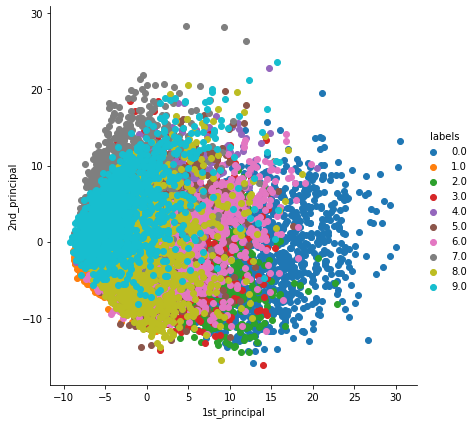

In [4]:
sn.FacetGrid(pca_df,hue="labels",size=6)\
  .map(plt.scatter,"1st_principal","2nd_principal")\
  .add_legend()
plt.show()

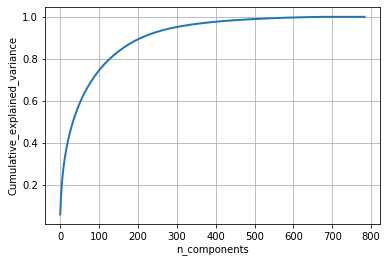

In [5]:
#PCA for DIMENSIONALITY REDUCTION
pca.n_components=784
pca_data=pca.fit_transform(sample_data)
percentage_var_explained=pca.explained_variance_ / np.sum(pca.explained_variance_)
cum_var_explained=np.cumsum(percentage_var_explained)
plt.figure(1,figsize=(6,4))
plt.clf()
plt.plot(cum_var_explained,linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

In [ ]:
# T-SNE using Scikit-learn
from sklearn.manifold import TSNE
data_1000=standardized_data[0:1000,:]
labels_1000=labels[0:1000]
model=TSNE(n_components=2,random_state=0,perplexity=30,n_iter=5000)
tsne_data=model.fit_transform(data_1000)
tsne_data=np.vstack((tsne_data.T,labels_1000)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=("Dim_1","Dim_2","label"))

C:\Users\aryan\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


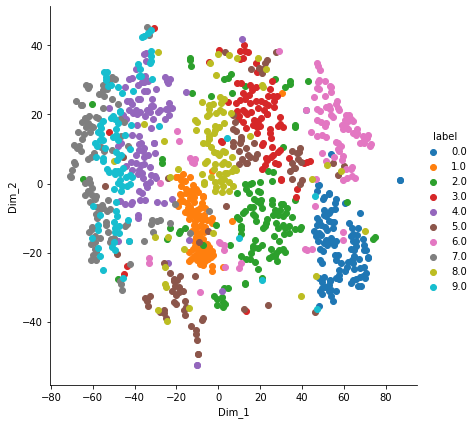

In [7]:
sn.FacetGrid(tsne_df,hue="label",size=6).map(plt.scatter,'Dim_1','Dim_2').add_legend()
plt.show()